#Problema 15 de la guía 2
##S. Schiavinato - LU: 153/11

In [15]:
import numpy as np
import numpy.random as random
import scipy.misc as misc
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
%matplotlib inline

#Formato de los gráficos consistente
plt.rcParams["figure.figsize"] = (30/2.54*(np.sqrt(5) + 1)/2,30/2.54)
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.labelsize"] = 19

In [3]:
def binomial(n, p):
    if (p > 1.0): #Probabilidades menores a 1 no existen
        return 0
    count = 0
    for i in range(n):
        r = random.uniform(0, 1)
        if r < p:
            count += 1
    return count

In [18]:
def G2_E15(op="b"):
    N, n, e, I, m = 1000, 25, 0.75, 15, 1000 #Datos de la experiencia
    pEm = I/m
    bins = np.arange(5,30,1, dtype=np.float)
    A = []
    for i in range(N): #Repito N veces el experimento elegido, lo que determina la cantidad de eventos contados
        if op == "b":
            bins = np.arange(5,20,1) #Cambio los bins por defecto para una mejor visualización del gráfico
            A.append(binomial(n, e)) #Cantidad de éxitos de un proceso binomial, con n tiradas y prob e de éxito
        elif op == "c":
            count = 0
            for i in range(m):
                count += binomial(1, pEm) #Un proceso de Bernoulli de medir un fotón en un intervalo dt 
            A.append(count) #Después de cada Dt agrego a la lista de experimentos la cuenta de fotones
        elif op == "d":
            count = 0
            for i in range(m):
                count += binomial(1, I/m) #Proba de dos eventos independientes de Bernoulli.
            A.append(binomial(count,e)) #Dada la cuenta de m eventos de Bernoulli, cuento la cant. detectada.
        elif op == "e":
            count = 0
            for i in range(m):
                count += binomial(1,e)*binomial(1, pEm) #Proba de dos eventos independientes de Bernoulli.
            A.append(count) #Luego de m eventos de Bernoulli, cuento la cantidad.
    #Defino la función teórica
    if op == "b":
        f = lambda t: misc.comb(n, t) * e**t * (1-e)**(n-t)
    elif op == "c":
        f = lambda t: np.exp(-I) * I**t/misc.factorial(t)
    else:
        f = lambda t: np.exp(-I*e) * (I*e)**t/misc.factorial(t)
    hist, bins = np.histogram(A, bins = bins)
    N = np.sum(hist)
    yerr = np.sqrt(hist/N * (1 - hist/N) * N) #Errores binomiales (o multinomiales)
    plt.bar(bins[:-1], hist/N, yerr=yerr/N, ecolor="r", label="Experiencia")
    plt.plot(bins[:-1], f(bins[:-1]), 'go', label="Distribución esperada") #Distribición teórica esperada
    plt.xlabel("({})".format(op)) #Referencia
    plt.legend(loc=0)

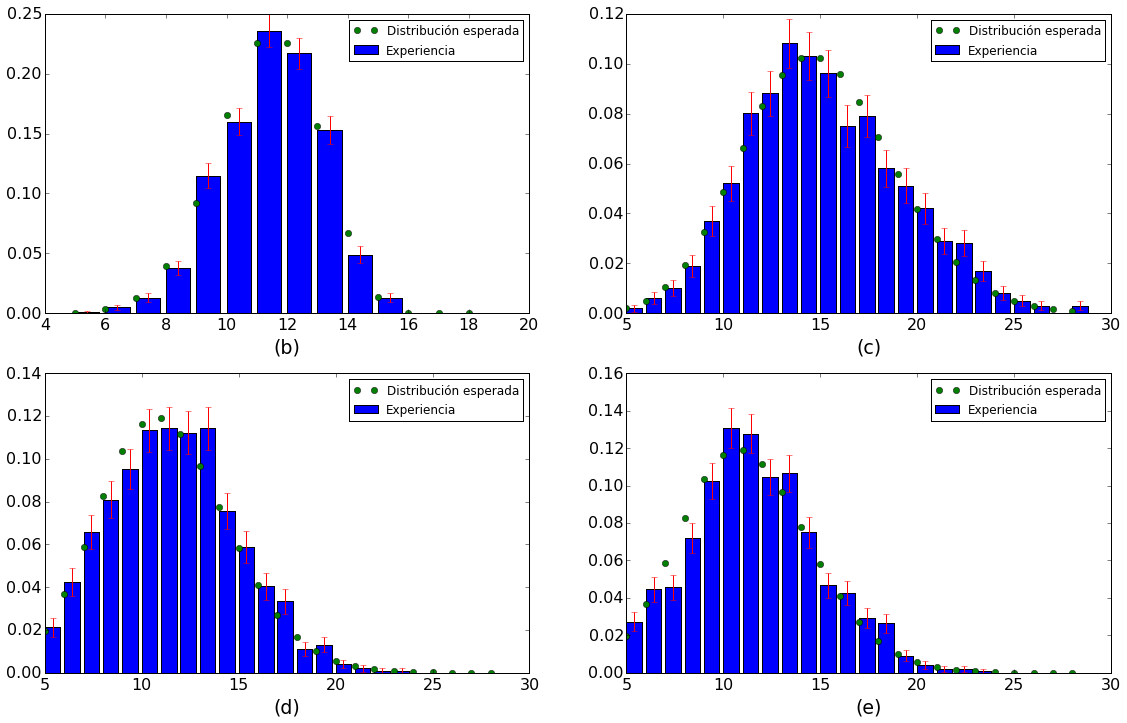

In [20]:
#Grafico con subplots los datos
plt.subplot(221)
G2_E15()
plt.subplot(222)
G2_E15(op="c")
plt.subplot(223)
G2_E15(op="d")
plt.subplot(224)
G2_E15(op="e")